In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('bookings.csv')
print(df.head())

                  Date         Time     Booking_ID        Booking_Status  \
0  2024-07-26 14:00:00  02:00:00 PM  CNR7153255142    Canceled by Driver   
1  2024-07-25 22:20:00  10:20:00 PM  CNR2940424040               Success   
2  2024-07-30 19:59:00  07:59:00 PM  CNR2982357879               Success   
3  2024-07-22 03:15:00  03:15:00 AM  CNR2395710036  Canceled by Customer   
4  2024-07-02 09:02:00  09:02:00 AM  CNR1797421769               Success   

  Customer_ID Vehicle_Type Pickup_Location Drop_Location  V_TAT  C_TAT  \
0   CID713523  Prime Sedan     Tumkur Road      RT Nagar    NaN    NaN   
1   CID225428         Bike     Magadi Road       Varthur  203.0   30.0   
2   CID270156    Prime SUV   Sahakar Nagar       Varthur  238.0  130.0   
3   CID581320        eBike      HSR Layout   Vijayanagar    NaN    NaN   
4   CID939555         Mini     Rajajinagar   Chamarajpet  252.0   80.0   

                     Canceled_Rides_by_Customer      Canceled_Rides_by_Driver  \
0                

In [18]:
print("Shape:", df.shape)
print("\nSchema:")
print(df.dtypes)
print("\nMissing values:")
print(df.isna().sum())
print("\nDescriptive stats (numeric):")
display(df.describe())

Shape: (71201, 20)

Schema:
Date                           object
Time                           object
Booking_ID                     object
Booking_Status                 object
Customer_ID                    object
Vehicle_Type                   object
Pickup_Location                object
Drop_Location                  object
V_TAT                         float64
C_TAT                         float64
Canceled_Rides_by_Customer     object
Canceled_Rides_by_Driver       object
Incomplete_Rides               object
Incomplete_Rides_Reason        object
Booking_Value                   int64
Payment_Method                 object
Ride_Distance                   int64
Driver_Ratings                float64
Customer_Rating               float64
Vehicle Images                 object
dtype: object

Missing values:
Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
V

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,44271.000000,44271.000000,71201.000000,71201.000000,44271.000000,44271.000000
mean,171.323620,84.955275,548.233901,14.206598,3.997994,3.997145
std,80.682293,35.959016,535.399324,15.778237,0.577948,0.578574
min,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,168.000000,85.000000,385.000000,8.000000,4.000000,4.000000
75%,238.000000,115.000000,622.000000,27.000000,4.500000,4.500000
max,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000


In [40]:
# Remove exact duplicate rows if any
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")
df['Date'] = pd.to_datetime(df['Date'])
df.info()

Removed 0 duplicate rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71201 entries, 0 to 71200
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        71201 non-null  datetime64[ns]
 1   Time                        71201 non-null  object        
 2   Booking_ID                  71201 non-null  object        
 3   Booking_Status              71201 non-null  object        
 4   Customer_ID                 71201 non-null  object        
 5   Vehicle_Type                71201 non-null  object        
 6   Pickup_Location             71201 non-null  object        
 7   Drop_Location               71201 non-null  object        
 8   V_TAT                       44271 non-null  float64       
 9   C_TAT                       44271 non-null  float64       
 10  Canceled_Rides_by_Customer  7214 non-null   object        
 11  Canceled_Rides_by_Driver    

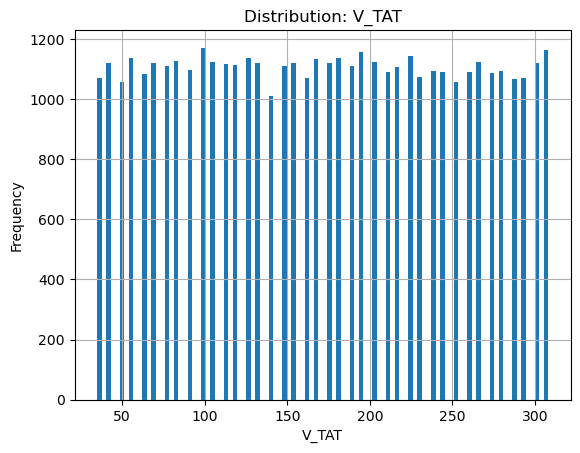

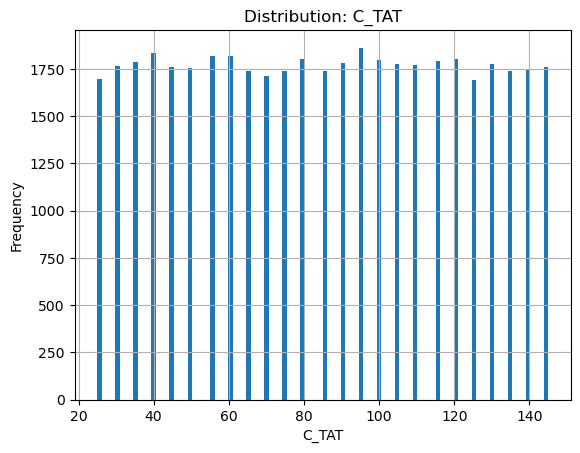

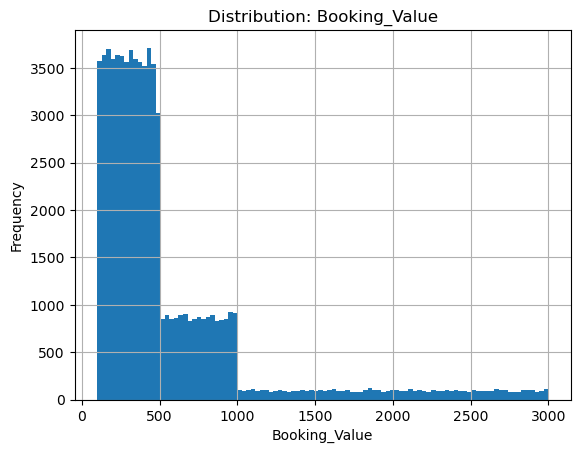

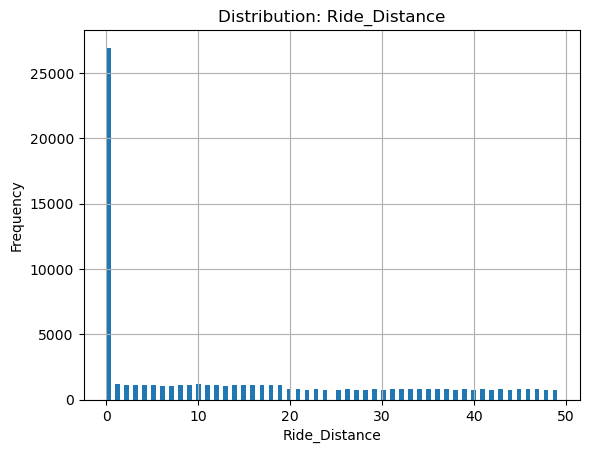

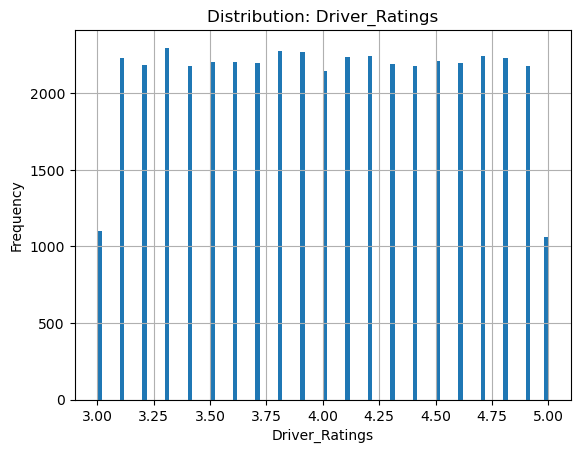

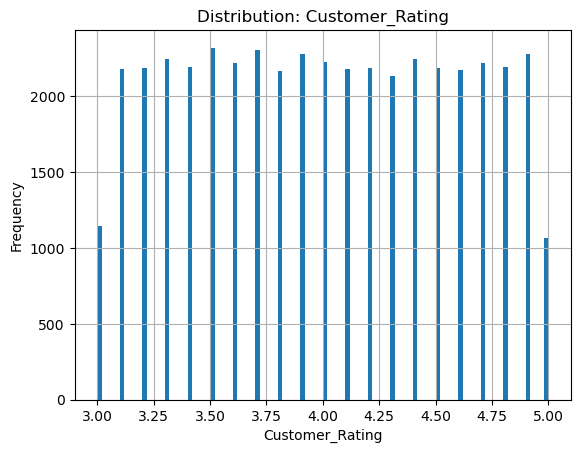

In [46]:
numeric_cols = ["V_TAT", "C_TAT", "Booking_Value", "Ride_Distance", "Driver_Ratings", "Customer_Rating"]

for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=100)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

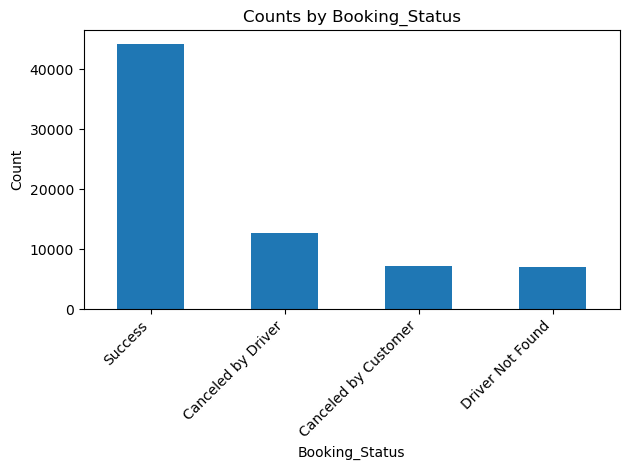

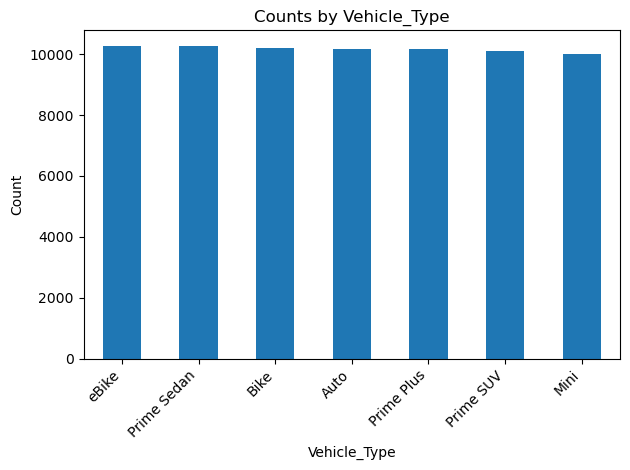

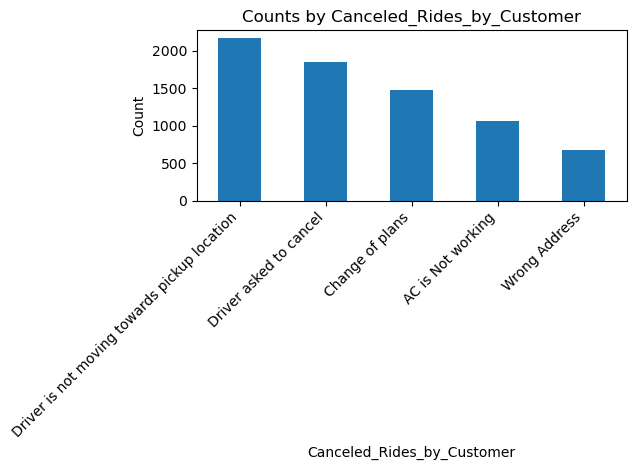

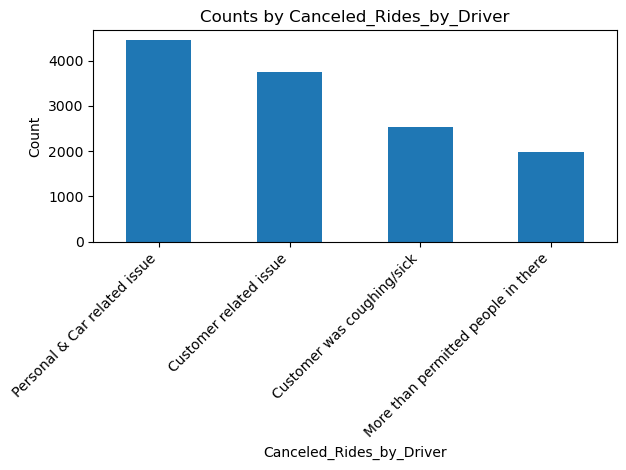

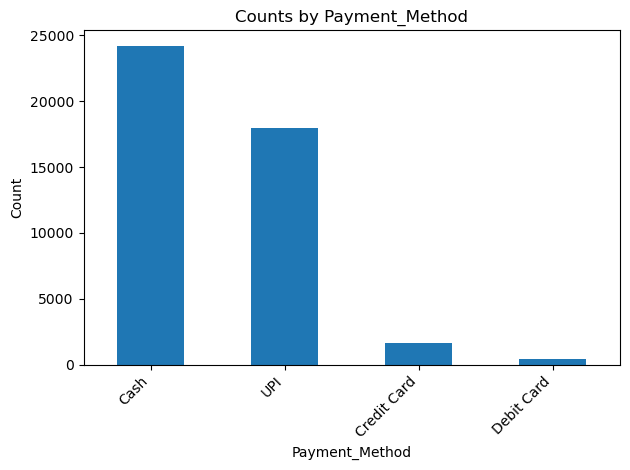

In [48]:
cat_cols = ["Booking_Status", "Vehicle_Type", "Canceled_Rides_by_Customer", "Canceled_Rides_by_Driver","Payment_Method",]

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Counts by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

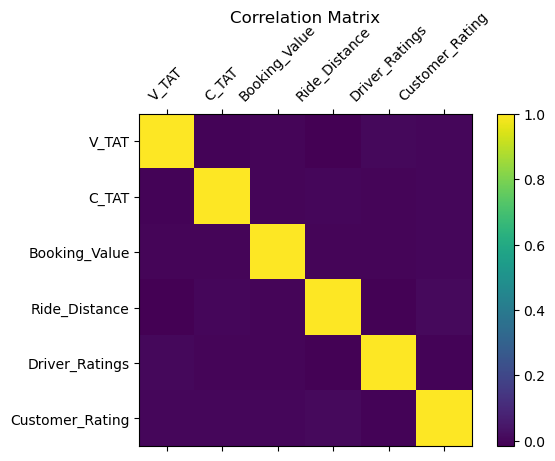

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
V_TAT,1.000000,-0.006479,-0.000544,-0.015960,0.005712,0.002823
C_TAT,-0.006479,1.000000,-0.001587,0.000821,-0.002856,0.000437
Booking_Value,-0.000544,-0.001587,1.000000,-0.001893,-0.000655,0.000790
Ride_Distance,-0.015960,0.000821,-0.001893,1.000000,-0.008978,0.009820
Driver_Ratings,0.005712,-0.002856,-0.000655,-0.008978,1.000000,-0.006533
Customer_Rating,0.002823,0.000437,0.000790,0.009820,-0.006533,1.000000


In [72]:
num_df = df[numeric_cols].select_dtypes(include=[np.number]).copy()
corr = num_df.corr(numeric_only=True)

plt.figure()
plt.matshow(corr, fignum=0)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix", y=1.25)
plt.colorbar()
plt.tight_layout()
plt.show()

corr


Average Booking_Value by Booking_Status:
 Booking_Status
Canceled by Driver      555.475173
Canceled by Customer    549.178958
Success                 547.008629
Driver Not Found        541.831425
Name: Booking_Value, dtype: float64


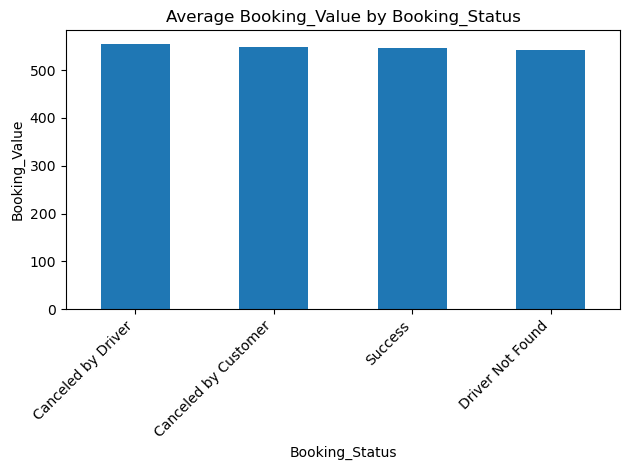


Average Booking_Value by Vehicle_Type:
 Vehicle_Type
Prime Sedan    561.036647
eBike          551.622627
Mini           547.748827
Prime Plus     547.582269
Auto           543.871782
Bike           543.800942
Prime SUV      541.794420
Name: Booking_Value, dtype: float64


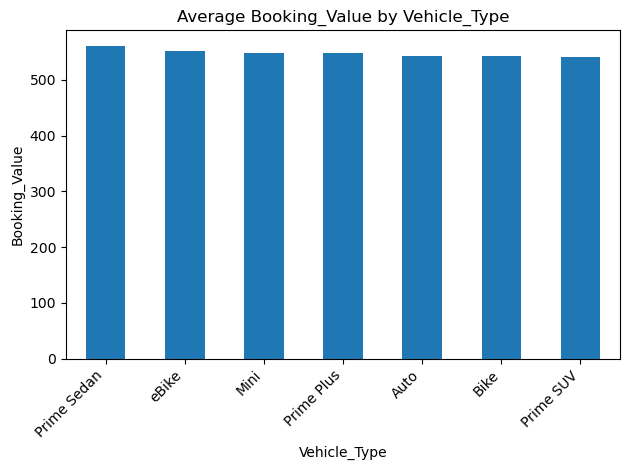


Average Booking_Value by Canceled_Rides_by_Customer:
 Canceled_Rides_by_Customer
Driver is not moving towards pickup location    575.241092
Change of plans                                 544.292035
AC is Not working                               537.216114
Driver asked to cancel                          536.312804
Wrong Address                                   530.439528
Name: Booking_Value, dtype: float64


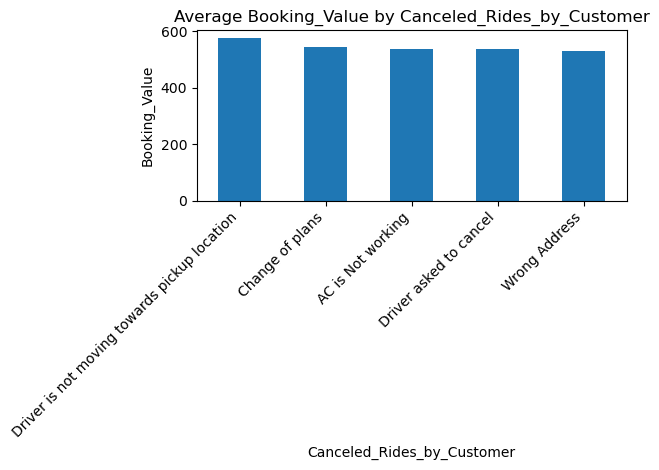


Average Booking_Value by Canceled_Rides_by_Driver:
 Canceled_Rides_by_Driver
Personal & Car related issue           564.914588
More than permitted people in there    560.106586
Customer was coughing/sick             549.076832
Customer related issue                 546.155117
Name: Booking_Value, dtype: float64


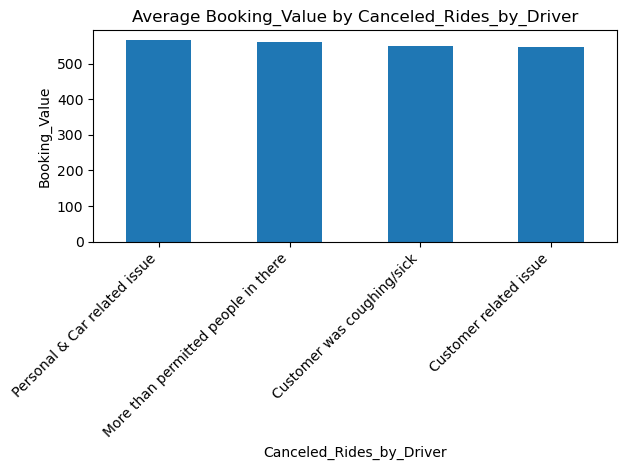


Average Booking_Value by Payment_Method:
 Payment_Method
Cash           548.671605
UPI            546.199789
Debit Card     534.982143
Credit Card    534.969697
Name: Booking_Value, dtype: float64


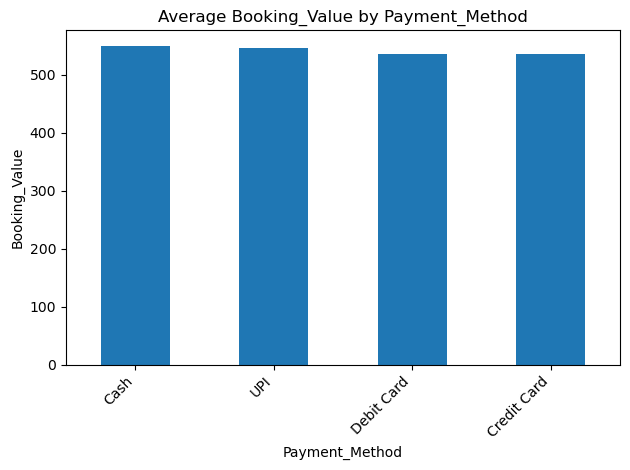

In [76]:
group_cols = ["Booking_Status", "Vehicle_Type", "Canceled_Rides_by_Customer", "Canceled_Rides_by_Driver","Payment_Method",]
metric = "Booking_Value"

for g in group_cols:
    grouped = df.groupby(g)[metric].mean().sort_values(ascending=False)
    print(f"\nAverage {metric} by {g}:\n", grouped)
    plt.figure()
    grouped.plot(kind="bar")
    plt.title(f"Average {metric} by {g}")
    plt.xlabel(g)
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

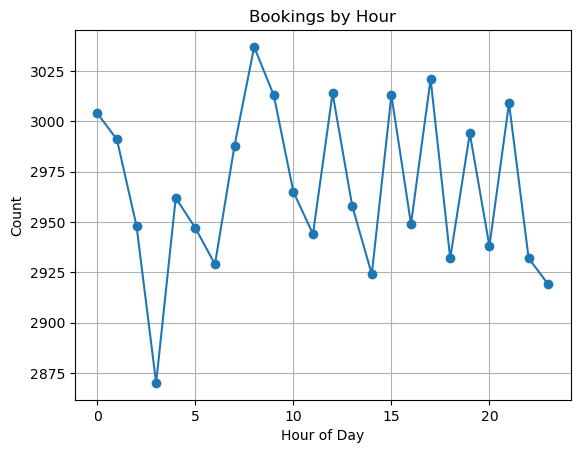

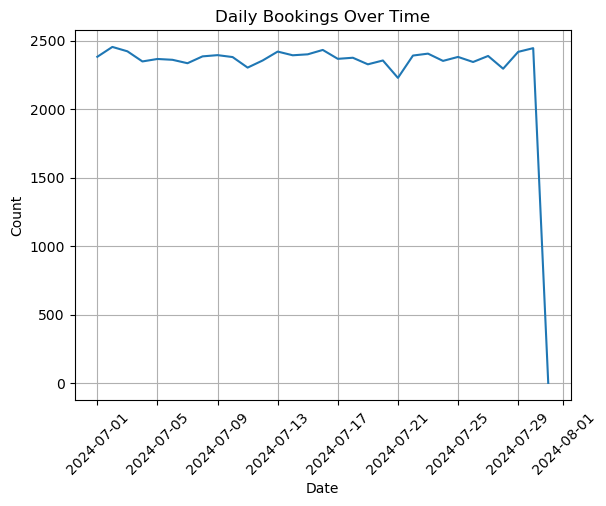

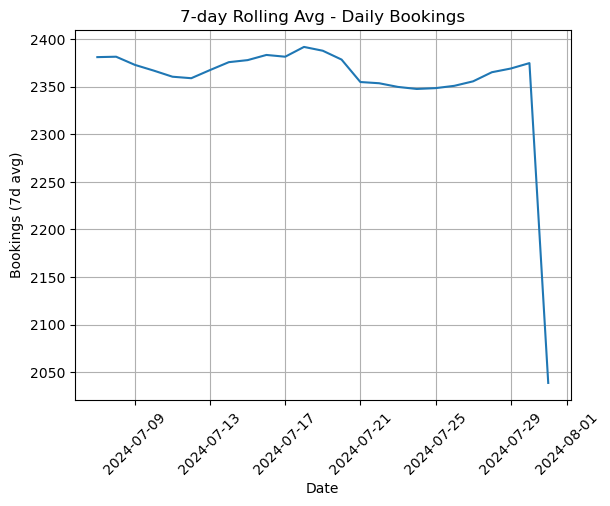

In [84]:
df["hour"] = df["Date"].dt.hour
df["date"] = df["Date"].dt.date

hourly = df.groupby("hour").size()
plt.figure()
hourly.plot(kind="line", marker="o")
plt.title("Bookings by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.grid(True)
plt.show()

daily = df.groupby("date").size()
plt.figure()
daily.plot(kind="line")
plt.title("Daily Bookings Over Time")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Rolling average (7-day)
plt.figure()
daily.rolling(7).mean().plot(kind="line")
plt.title("7-day Rolling Avg - Daily Bookings")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Bookings (7d avg)")
plt.grid(True)
plt.show()

Ride_Distance: 0 outliers; bounds=(-40.5, 67.5)


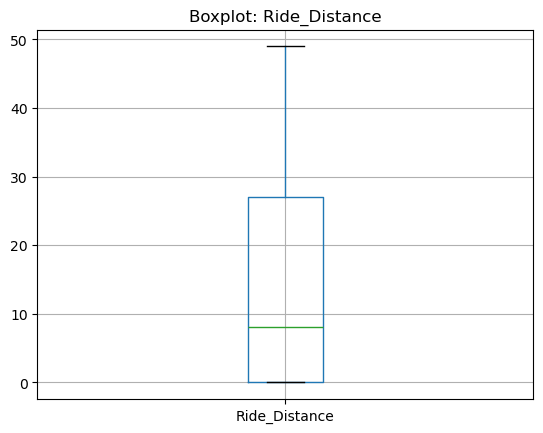

hour: 0 outliers; bounds=(-10.5, 33.5)


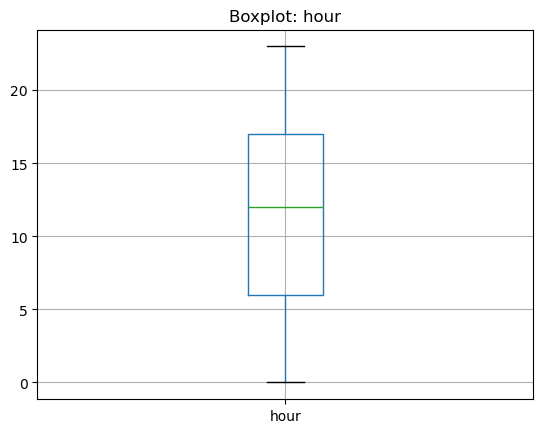

Booking_Value: 5823 outliers; bounds=(-328.0, 1192.0)


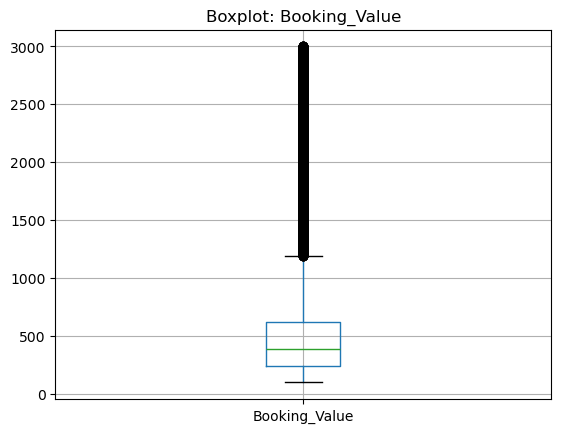

In [88]:
def iqr_outlier_flags(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (series < lower) | (series > upper), lower, upper

for col in ["Ride_Distance", "hour", "Booking_Value"]:
    flags, lower, upper = iqr_outlier_flags(df[col])
    print(f"{col}: {flags.sum()} outliers; bounds=({round(lower,2)}, {round(upper,2)})")
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Boxplot: {col}")
    plt.show()


Cancellation Rate (%) by Pickup_Location (Top 10):
 Pickup_Location
Whitefield          92.062367
RT Nagar            91.534756
Magadi Road         91.262136
Koramangala         91.151079
BTM Layout          91.126280
Ramamurthy Nagar    91.070211
KR Puram            90.946502
Shivajinagar        90.940767
Hulimavu            90.935046
Electronic City     90.909091
Name: is_canceled, dtype: float64


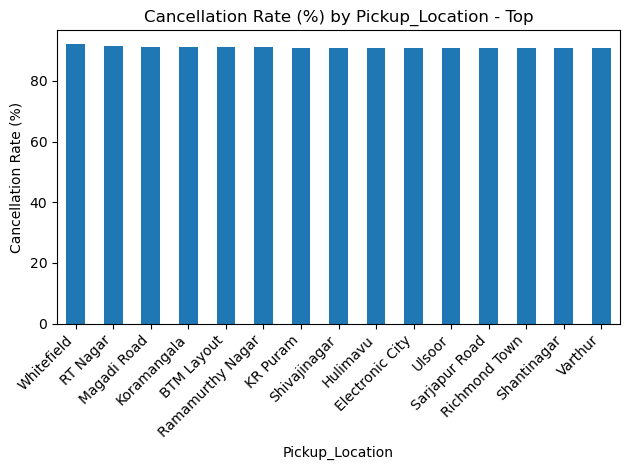


Cancellation Rate (%) by Drop_Location (Top 10):
 Drop_Location
BTM Layout              91.689944
Tumkur Road             91.274238
HSR Layout              91.052994
Indiranagar             90.961678
Rajarajeshwari Nagar    90.960854
JP Nagar                90.859107
RT Nagar                90.810075
Chickpet                90.751445
Langford Town           90.743338
Banashankari            90.743338
Name: is_canceled, dtype: float64


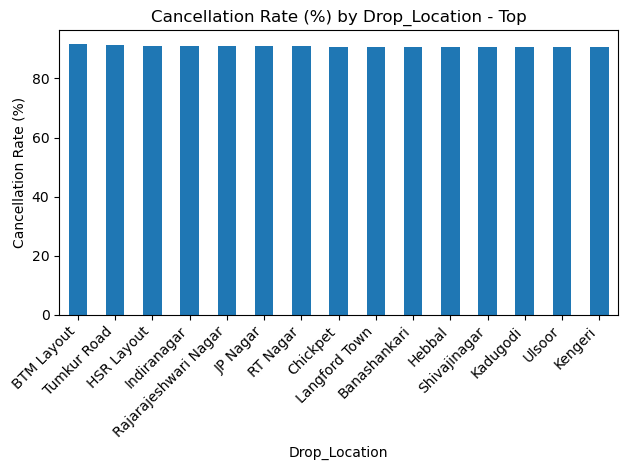


Cancellation Rate (%) by hour (Top 10):
 hour
14    91.279070
5     91.007805
15    91.005642
11    90.726902
4     90.648211
3     90.592334
8     90.418176
18    90.381992
16    90.369617
17    90.268123
Name: is_canceled, dtype: float64


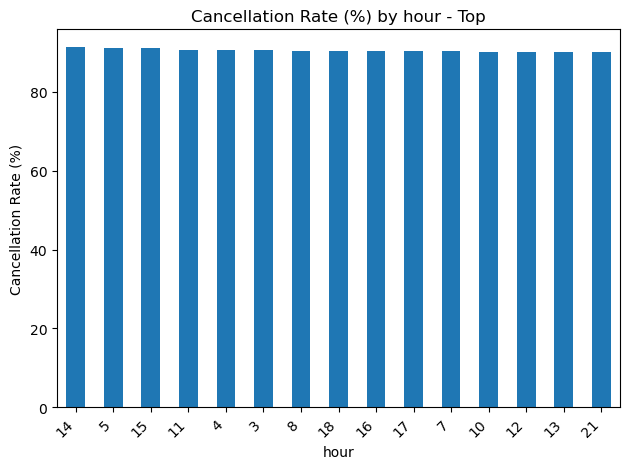


Cancellation Rate (%) by Vehicle_Type (Top 10):
 Vehicle_Type
Bike           90.503287
Prime Sedan    90.497076
eBike          90.439100
Auto           90.263313
Mini           90.196666
Prime Plus     89.944958
Prime SUV      89.444005
Name: is_canceled, dtype: float64


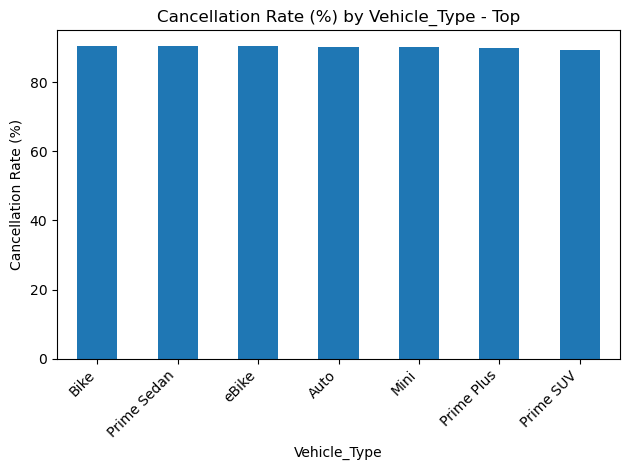

{'Total Bookings': 71201,
 'Completion Rate %': 9.81,
 'Avg Fare': 548.23,
 'Avg Distance (km)': 14.21}

In [92]:

df["is_canceled"] = df["Booking_Status"].isin(["Canceled by Driver", "Canceled by Customer", "Success"])
df["avg_speed_kmph"] = (df["Ride_Distance"] / (df["hour"])).replace([np.inf, -np.inf], np.nan)
df["is_peak"] = df["hour"].between(8,10) | df["hour"].between(18,21)

# Cancellation rate by city/hour/category
for g in ["Pickup_Location","Drop_Location","hour", "Vehicle_Type"]:
    cr = df.groupby(g)["is_canceled"].mean().sort_values(ascending=False) * 100
    print(f"\nCancellation Rate (%) by {g} (Top 10):\n", cr.head(10))
    plt.figure()
    cr.head(15).plot(kind="bar")
    plt.title(f"Cancellation Rate (%) by {g} - Top")
    plt.xlabel(g)
    plt.ylabel("Cancellation Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Simple key metrics
overall = {
    "Total Bookings": int(df.shape[0]),
    "Completion Rate %": round((~df["is_canceled"]).mean() * 100, 2),
    "Avg Fare": round(df["Booking_Value"].mean(), 2),
    "Avg Distance (km)": round(df["Ride_Distance"].mean(), 2)
}
overall

In [98]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71201 entries, 0 to 71200
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        71201 non-null  datetime64[ns]
 1   Time                        71201 non-null  object        
 2   Booking_ID                  71201 non-null  object        
 3   Booking_Status              71201 non-null  object        
 4   Customer_ID                 71201 non-null  object        
 5   Vehicle_Type                71201 non-null  object        
 6   Pickup_Location             71201 non-null  object        
 7   Drop_Location               71201 non-null  object        
 8   V_TAT                       44271 non-null  float64       
 9   C_TAT                       44271 non-null  float64       
 10  Canceled_Rides_by_Customer  7214 non-null   object        
 11  Canceled_Rides_by_Driver    12728 non-null  object    

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,hour,date,is_canceled,avg_speed_kmph,is_peak
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,NaN,0,NaN,NaN,#NAME?,14,2024-07-26,True,0.000000,False
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,Cash,13,4.1,4.0,#NAME?,22,2024-07-25,True,0.590909,False
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,UPI,40,4.2,4.8,#NAME?,19,2024-07-30,True,2.105263,True
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,0,NaN,NaN,#NAME?,3,2024-07-22,True,0.000000,False
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,Credit Card,45,4.0,3.0,#NAME?,9,2024-07-02,True,5.000000,True


In [100]:
clean_cols = ["Date","Booking_ID","Booking_Status","Customer_ID","Vehicle_Type","Pickup_Location",
              "Drop_Location","V_TAT","C_TAT","Payment_Method","Ride_Distance","Driver_Ratings",
              "Customer_Rating","is_canceled","hour","date","is_canceled","avg_speed_kmph","is_peak"]
clean = df[clean_cols].copy()
clean_path = "ola_rides_clean.csv"
clean.to_csv(clean_path, index=False)
print("Saved cleaned dataset to", clean_path)

Saved cleaned dataset to ola_rides_clean.csv
